<a href="https://colab.research.google.com/github/arpithaupd/An-Optimized-TL-based-Approach-for-Auto.-Detection-of-COVID-19-from-Chest-X-ray-Images/blob/master/CNN_Intubation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [138]:
! git clone https://github.com/arpithaupd/CXRDataset.git

fatal: destination path 'CXRDataset' already exists and is not an empty directory.


In [82]:
#! git clone https://github.com/education454/datasets.git

In [139]:
import os 
main_dir = '/content/CXRDataset' #'/content/datasets/Data'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'intubated')
train_normal_dir = os.path.join(train_dir,'nointubated')
test_covid_dir = os.path.join(test_dir,'intubated')
test_normal_dir = os.path.join(test_dir,'nointubated')


In [140]:
print(train_dir,train_covid_dir)

/content/CXRDataset/train /content/CXRDataset/train/intubated


In [144]:
print(test_covid_dir,test_normal_dir)

/content/CXRDataset/test/intubated /content/CXRDataset/test/nointubated


In [145]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['16654_2_1.jpg', 'F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg', 'post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day1.jpg', 'fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.original.png', 'lancet-case2a.jpg', 'covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg', 'AR-2.jpg', 'ARDSSevere.png', '16654_1_1.png', '16660_2_1.jpg']
['nejmoa2001191_f5-PA.jpeg', '000010-5.jpg', 'nejmoa2001191_f4.jpeg', 'nejmoa2001191_f1-PA.jpeg', 'F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg', '16583_3_1.jpg', '16583_1_1.jpg', '000002-19-a.jpg', 'auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'figure1-5e71be566aa8714a04de3386-98-left.jpeg']
['11547_2020_1203_Fig1_HTML-c.png', '41182_2020_203_Fig4_HTML.jpg', '10.1016-slash-j.anl.2020.04.002-b.png', 'article_river_c79329e06dff11eab69c95940c7c0d00-CXR-D1-COVID19.png', '16673_2_1.jpg', '41182_2020_203_Fig5_HTML.jpg', 'article_river_de7471906e0011eabe5f9363acaf45c4-covid-cxr-2.png', '

In [146]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))


train dataset covid images : 44
train dataset normal images : 44
test dataset covid images : 24
test dataset normal images : 26
Total train images : 88
Total test images : 50


# Data Visualization

['/content/CXRDataset/train/intubated/16654_2_1.jpg', '/content/CXRDataset/train/intubated/F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg', '/content/CXRDataset/train/intubated/post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day1.jpg', '/content/CXRDataset/train/intubated/fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.original.png', '/content/CXRDataset/train/intubated/lancet-case2a.jpg', '/content/CXRDataset/train/intubated/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg', '/content/CXRDataset/train/intubated/AR-2.jpg', '/content/CXRDataset/train/intubated/ARDSSevere.png']
['/content/CXRDataset/train/nointubated/nejmoa2001191_f5-PA.jpeg', '/content/CXRDataset/train/nointubated/000010-5.jpg', '/content/CXRDataset/train/nointubated/nejmoa2001191_f4.jpeg', '/content/CXRDataset/train/nointubated/nejmoa2001191_f1-PA.jpeg', '/content/CXRDataset/train/nointubated/F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg', '/content/CXRDataset/train

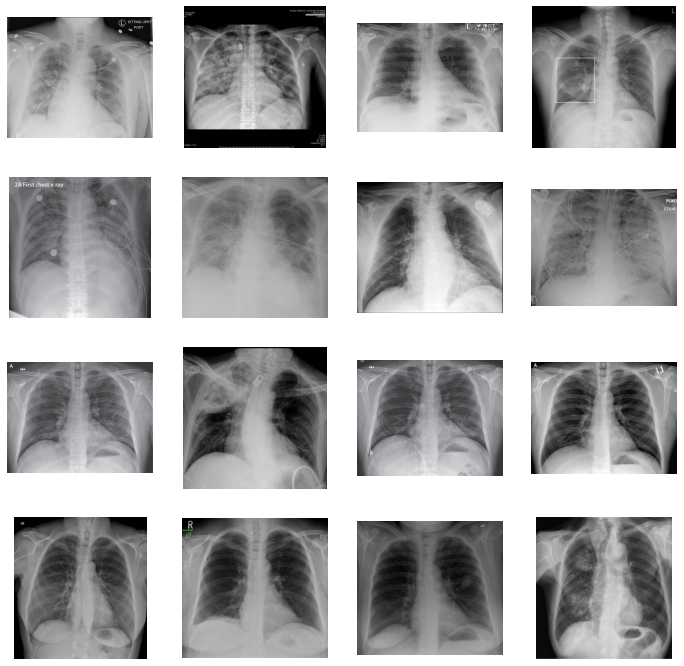

In [147]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal) 


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  #data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  #sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()

# Generating Training , Validation & Testing Batches

In [148]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                               

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (224,224),
                                                    subset = 'training',
                                                    batch_size = 10, #arpitha changed 32 to 10
                                                    class_mode = 'binary') #arpitha changed 150 to 224

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (224,224),
                                                    subset = 'validation',
                                                    batch_size = 10, #arpitha changed 32 to 10
                                                    class_mode = 'binary') #arpitha changed 150 to 224

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (224,224),
                                                    batch_size = 10, #arpitha changed 32 to 10
                                                    class_mode = 'binary') #arpitha changed 150 to 224

Found 72 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [149]:
train_generator.class_indices

{'intubated': 0, 'nointubated': 1}

In [150]:
train_generator.image_shape

(224, 224, 3)

# Build CNN Model

In [151]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from keras import models
from keras import layers

from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

model = Sequential()

In [152]:
#import torchxrayvision as xrv


#model = xrv.models.DenseNet(weights='all')
#model.summary()

conv_base = tf.keras.applications.DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3)) #arpitha changed 150 to 224

In [129]:

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3)) #arpitha changed 150 to 224

In [153]:


conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

#https://github.com/EXJUSTICE/COVID19_Detection_Transfer_Learning_VGG16/blob/master/Covid19_GradientCrescent_Binary.ipynb

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten_6 (Flatten)         (None, 81536)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               20873472  
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 33,516,609
Trainable params: 20,873,729
Non-trainable params: 12,642,880
_________________________________________________________________


In [130]:
#arpitha moved to text - some CNN model with less data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(224,224,3))) #arpitha changed 150 to 224
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)      



# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

# Compile & Train Model

In [154]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [155]:
#train the model
history = model.fit(train_generator,
                              epochs=10,
                              validation_data = validation_generator,
                              validation_steps = 10)

#20 10 : 56 with LR 0.001
#20 10 : 61 with LR 0.0001
#20 5  : 56 with LR 0.0001
#20 5  : 81 with LR 0.0001 with VGG
#20 5  : 98 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 90 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 84 with LR 0.0001 with tf.keras.applications.DenseNet169 image sized 224 from 150

Epoch 1/10
8/8 [==============================] - 25s 2s/step - loss: 2.4055 - accuracy: 0.6111 - val_loss: 2.0750 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 4s 518ms/step - loss: 0.8570 - accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 4s 512ms/step - loss: 0.7731 - accuracy: 0.7917
Epoch 4/10
8/8 [==============================] - 4s 445ms/step - loss: 0.5631 - accuracy: 0.7639
Epoch 5/10
8/8 [==============================] - 4s 506ms/step - loss: 0.4591 - accuracy: 0.8333
Epoch 6/10
8/8 [==============================] - 4s 460ms/step - loss: 0.3087 - accuracy: 0.8472
Epoch 7/10
8/8 [==============================] - 4s 422ms/step - loss: 0.2547 - accuracy: 0.9167
Epoch 8/10
8/8 [==============================] - 4s 480ms/step - loss: 0.1086 - accuracy: 0.9722
Epoch 9/10
8/8 [==============================] - 4s 449ms/step - loss: 0.0996 - accuracy: 0.9722
Epoch 10/10
8/8 [==============================] - 4s 513ms/step - loss: 0.084

In [156]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

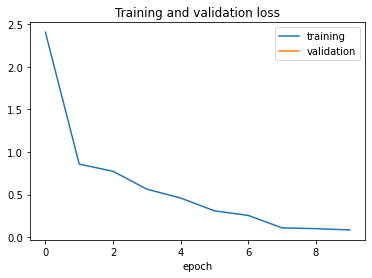

In [157]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

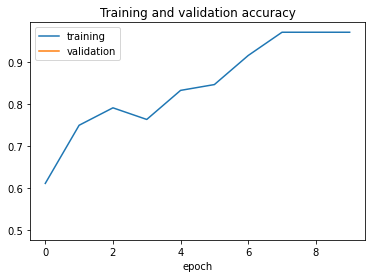

In [158]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [159]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

#20 5  : 76 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 45 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 77 with LR 0.0001 with tf.keras.applications.DenseNet169 image sized 224 from 150

5/5 [==============================] - 1s 254ms/step - loss: 0.8178 - accuracy: 0.7200
test acc :0.7200000286102295 test loss:0.8178035020828247


In [162]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(224,224)) #arpitha changed 150 to 224
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  print(classes)
  if classes<=0.3: #classes==0
    print('Covid19')
  else:
    print('Normal')

Saving 000001.jpg to 000001 (1).jpg
/content/000001.jpg
000001.jpg
[[0.00077065]]
Covid19


In [102]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5') 